# Relatório Final - Ciência de Dados
## Bacharelado em Ciência da Computação / PUCPR

Professor Jean Paul Barddal

`Alex Cohen Dambrós Lopes` - `alex-dambros@hotmail.com`   

`Caio Henrique Martins` - `caiohmsts@gmail.com`   

`Carlos Henrique dos Santos` - `carlos.hm25@hotmail.com`   
 
`Gabriel Scholze Rosa` - `gabrielscholze24@gmail.com`   

`Matheus Leindorf Muller` - `matheus.l.muller@gmail.com`

`Yerik Koslowski` - `yerik.koslowski@pucpr.edu.br`

`2022`

# Imports

In [42]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

pd.set_option('display.max_rows', None)

# Método utilizado para carregar as bases de dados

In [2]:
if not os.path.isfile('train.csv'):
    !wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

if not os.path.isfile('test.csv'):
    !wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

--2022-09-14 03:10:59--  https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wxz0qd1ngjb1z2d/train.csv [following]
--2022-09-14 03:10:59--  https://www.dropbox.com/s/raw/wxz0qd1ngjb1z2d/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb3059f78dcec1a45ede792413.dl.dropboxusercontent.com/cd/0/inline/Bs6SLo1FsJZaYDIh4R6L_ow5i6gHdZ7MKE_q9FUTeURFw0Q5TXfpmBCRrM7mPJHM2lsR8ryGwPFEdPP_GoHIUPxwEEPXvh_iTTGbbJWd9WFji1LaH4Msj6K3XMvkIM8nLbC4xXdrB2naRxYXqd4faBP2jgUlYaAGwmH5dlpZibeBhw/file# [following]
--2022-09-14 03:11:00--  https://ucdb3059f78dcec1a45ede792413.dl.dropboxusercontent.com/cd/0/inline/Bs6SLo1FsJZaYDIh4R6L_ow5i6gHdZ7MKE_q9FUTeURFw0Q5TXfpmBCRrM7mPJHM2lsR8ryGwPFEdPP_GoHIUPxwE

# Abrindo as bases de treino e teste

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Contexto da base


### A base de Credibilidade Financeira estudada é um agregado de dados de diversas fontes com informações pessoais de clientes que pagaram suas dívidas ou não.




# Quantidade de Instancias


In [4]:
train.shape[0]

92106

# Quantidade de Atributos


In [5]:
train.shape[1]

70

# Descrição textual de 10 atributos

 - `BOLSAFAMILIACASA` é uma coluna com valores booleanos. Um valor verdadeiro indica que algum integrante do domicílio participa do programa bolsa familia.
 - `FUNCIONARIOPUBLICO` também é uma coluna com valores booleanos. Neste caso um valor verdadeiro indica que o cpf pertence a um funcionário público.
 - `QTDENDERECO` é uma coluna de valores numéricos indicando quantos endereços distintos o proponente possui na base.
 - `QTDDECLARACAOISENTA` é uma coluna numérica contendo a quantidade de vezes que o CPF declarou imposto de renda como isento nos últimos 10 anos.
 - `QTDFONEFIXO` é uma coluna numérica contendo quantos telefones fixos distintos o proponente possui na base. 
 - `QTDCELULAR` é uma coluna numérica contendo quantos telefones celulares distintos o proponente possui na base.
 - `QTDDECLARACAO10` também é uma coluna numérica, indicando quantas vezes o CPF fez a declaração de imposto de renda nos últimos 10 anos.
 - `INDICEEMPREGO` é uma coluna numérica que aponta o índice de estabilidade do CPF no emprego.
 - `QTDEMAIL` é uma coluna numérica, indicando quantos endereços de email distintos o proponente possui na base. 
 - `TEMPOCPF` é uma coluna numérica que indica quanto tempo se passou (em anos) desde a emissão do CPF do proponente.

# Remove as colunas de acordo com a LEI Nº 12.414 DE 09 DE JUNHO DE 2011

In [6]:
train.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
test.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)

# Info das colunas, utilizado para saber o tipo abordado em cada coluna

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TEMPOCPF                      92106 non-null  int64  
 1   DISTCENTROCIDADE              92106 non-null  int64  
 2   DISTZONARISCO                 92106 non-null  int64  
 3   QTDENDERECO                   92106 non-null  int64  
 4   QTDEMAIL                      92106 non-null  int64  
 5   QTDCELULAR                    92106 non-null  int64  
 6   CELULARPROCON                 92106 non-null  int64  
 7   QTDFONEFIXO                   92106 non-null  int64  
 8   TELFIXOPROCON                 92106 non-null  int64  
 9   INDICEEMPREGO                 92106 non-null  int64  
 10  PORTEEMPREGADOR               92106 non-null  int64  
 11  SOCIOEMPRESA                  92106 non-null  int64  
 12  FUNCIONARIOPUBLICO            92106 non-null  int64  
 13  S

Podemos observar que 66 variáveis são do tipo INT e apenas o TARGET é uma variável do tipo float

# Transformando os valores negativos em NaN

No contexto da base valores negativos não são validos, portanto os valores negativos são transformados em `NaN (Not a Number).

In [8]:
train[train < 0] = np.nan

# Descrição geral da base de Treino

Contendo:
 - Contagem dos valores
 - Média
 - Desvio padrão
 - os Quartis
 - Valor máximo e mínimo de cada coluna.

In [9]:
train.describe()

TEMPOCPF  DISTCENTROCIDADE  DISTZONARISCO   QTDENDERECO  \
count  89174.000000      71439.000000   71439.000000  90887.000000   
mean      15.708536       4033.569703   79226.773107      1.381793   
std        7.988884       4823.507383  140963.157129      1.273494   
min        0.000000          0.000000       0.000000      0.000000   
25%        9.000000        486.000000     480.000000      1.000000   
50%       15.000000       2900.000000    3166.000000      1.000000   
75%       24.000000       5480.500000  129576.500000      2.000000   
max       27.000000      49716.000000  842292.000000     48.000000   

           QTDEMAIL    QTDCELULAR  CELULARPROCON   QTDFONEFIXO  TELFIXOPROCON  \
count  90887.000000  90887.000000   90887.000000  90887.000000   90887.000000   
mean       0.342304      0.962261       0.002355      1.448876       0.010937   
std        0.579046      1.185530       0.048467      1.490207       0.104006   
min        0.000000      0.000000       0.000000      0.000000       0.000000   
25%        0.000000      0.000000       0.000000      0.000000       0.000000   
50%        0.000000      1.000000       0.000000      1.000000       0.000000   
75%        1.000000      1.000000       0.000000      2.000000       0.000000   
max        8.000000     42.000000       1.000000    110.000000       1.000000   

       INDICEEMPREGO  ...  QTDDECLARACAOISENTA  QTDDECLARACAO10  \
count   90887.000000  ...         90887.000000     90887.000000   
mean        1.501304  ...             1.060163         1.575759   
std         2.155579  ...             2.107578         3.049371   
min         0.000000  ...             0.000000         0.000000   
25%         0.000000  ...             0.000000         0.000000   
50%         0.000000  ...             0.000000         0.000000   
75%         3.000000  ...             1.000000         1.000000   
max         6.000000  ...             9.000000        10.000000   

       QTDDECLARACAOREST10  QTDDECLARACAOPAGAR10  RESTITUICAOAGENCIAALTARENDA  \
count         90887.000000          90887.000000                 90887.000000   
mean              0.723349              0.230913                     0.003642   
std               2.056418              1.035539                     0.060238   
min               0.000000              0.000000                     0.000000   
25%               0.000000              0.000000                     0.000000   
50%               0.000000              0.000000                     0.000000   
75%               0.000000              0.000000                     0.000000   
max              10.000000             10.000000                     1.000000   

       BOLSAFAMILIA  ANOSULTIMARESTITUICAO  ANOSULTIMADECLARACAO  \
count  90887.000000           15176.000000          31960.000000   
mean       0.040545               2.846863              4.268867   
std        0.197234               3.188841              4.184804   
min        0.000000               1.000000              1.000000   
25%        0.000000               1.000000              1.000000   
50%        0.000000               1.000000              1.000000   
75%        0.000000               3.000000              7.000000   
max        1.000000              18.000000             17.000000   

       ANOSULTIMADECLARACAOPAGAR        TARGET  
count                8604.000000  92106.000000  
mean                    4.855532      0.095629  
std                     4.377425      0.294083  
min                     1.000000      0.000000  
25%                     1.000000      0.000000  
50%                     3.000000      0.000000  
75%                     8.000000      0.000000  
max                    23.000000      1.000000  

[8 rows x 67 columns]

# Porcentagem de valores nulos em cada coluna

In [10]:
(train.isna().sum() / len(train))*100

TEMPOCPF                         3.183289
DISTCENTROCIDADE                22.438278
DISTZONARISCO                   22.438278
QTDENDERECO                      1.323475
QTDEMAIL                         1.323475
QTDCELULAR                       1.323475
CELULARPROCON                    1.323475
QTDFONEFIXO                      1.323475
TELFIXOPROCON                    1.323475
INDICEEMPREGO                    1.323475
PORTEEMPREGADOR                  1.323475
SOCIOEMPRESA                     1.323475
FUNCIONARIOPUBLICO               1.323475
SEGMENTACAO                      1.323475
SEGMENTACAOCOBRANCA              1.323475
SEGMENTACAOECOM                  1.323475
SEGMENTACAOFIN                   1.323475
SEGMENTACAOTELECOM               1.323475
QTDPESSOASCASA                  62.079561
MENORRENDACASA                  62.079561
MAIORRENDACASA                  62.079561
SOMARENDACASA                   62.079561
MEDIARENDACASA                  62.079561
MAIORIDADECASA                  62

In [11]:
train.isna().sum()

TEMPOCPF                         2932
DISTCENTROCIDADE                20667
DISTZONARISCO                   20667
QTDENDERECO                      1219
QTDEMAIL                         1219
QTDCELULAR                       1219
CELULARPROCON                    1219
QTDFONEFIXO                      1219
TELFIXOPROCON                    1219
INDICEEMPREGO                    1219
PORTEEMPREGADOR                  1219
SOCIOEMPRESA                     1219
FUNCIONARIOPUBLICO               1219
SEGMENTACAO                      1219
SEGMENTACAOCOBRANCA              1219
SEGMENTACAOECOM                  1219
SEGMENTACAOFIN                   1219
SEGMENTACAOTELECOM               1219
QTDPESSOASCASA                  57179
MENORRENDACASA                  57179
MAIORRENDACASA                  57179
SOMARENDACASA                   57179
MEDIARENDACASA                  57179
MAIORIDADECASA                  57189
MENORIDADECASA                  57189
MEDIAIDADECASA                  57189
INDICMENORDE

# Criando um dataframe de metadados das colunas
 - Nome da coluna
 - Valores mínimos e máximos
 - Porcentagem de valores nulos
 - correlação da coluna com o Target

In [12]:
target = train["TARGET"]

data = {
    "names":[],
    "min": [],
    "max": [],
    "%null": [],
    "correlation": [],
}
for (columnName, columnData) in train.iteritems():
    data['names'].append(columnName)
    values = list(filter(lambda a: not np.isnan(a) ,columnData))
    nanvalues = len(list(filter(np.isnan ,columnData)))
    data['min'].append(min(values) if len(values) > 0 else np.nan)
    data['max'].append(max(values) if len(values) > 0 else np.nan)
    data['%null'].append(nanvalues/len(columnData))
    data["correlation"].append(abs(round(train[columnName].corr(target)*100,2)))

infoColumns = pd.DataFrame.from_dict(data)
infoColumns.sort_values('correlation',inplace=True, ascending=False)
infoColumns.to_csv("infoColumns.csv", index = False)

In [13]:
infoColumns = pd.read_csv('infoColumns.csv')

In [14]:
infoColumns.head(15)

names    min      max     %null  correlation
0                TARGET    0.0      1.0  0.000000       100.00
1              TEMPOCPF    0.0     27.0  0.031833        12.02
2              QTDEMAIL    0.0      8.0  0.013235         7.75
3       QTDDECLARACAO10    0.0     10.0  0.013235         7.47
4         INDICEEMPREGO    0.0      6.0  0.013235         7.47
5            QTDCELULAR    0.0     42.0  0.013235         7.40
6           QTDFONEFIXO    0.0    110.0  0.013235         6.99
7   QTDDECLARACAOISENTA    0.0      9.0  0.013235         6.81
8           QTDENDERECO    0.0     48.0  0.013235         6.61
9       ESTIMATIVARENDA  400.0  30000.0  0.013235         6.48
10     BOLSAFAMILIACASA    0.0      1.0  0.620796         6.11
11  QTDDECLARACAOREST10    0.0     10.0  0.013235         5.90
12       MEDIARENDACASA  400.0  30000.0  0.620796         5.66
13       MEDIAIDADECASA   11.0     94.0  0.620904         5.61
14       MENORRENDACASA  400.0  30000.0  0.620796         4.73

# Análise de correlação

Abaixo está o grafico de correlação entre todas as colunas.

Ambos gráficos apresentam a mesma informação, mas de maneira diferente

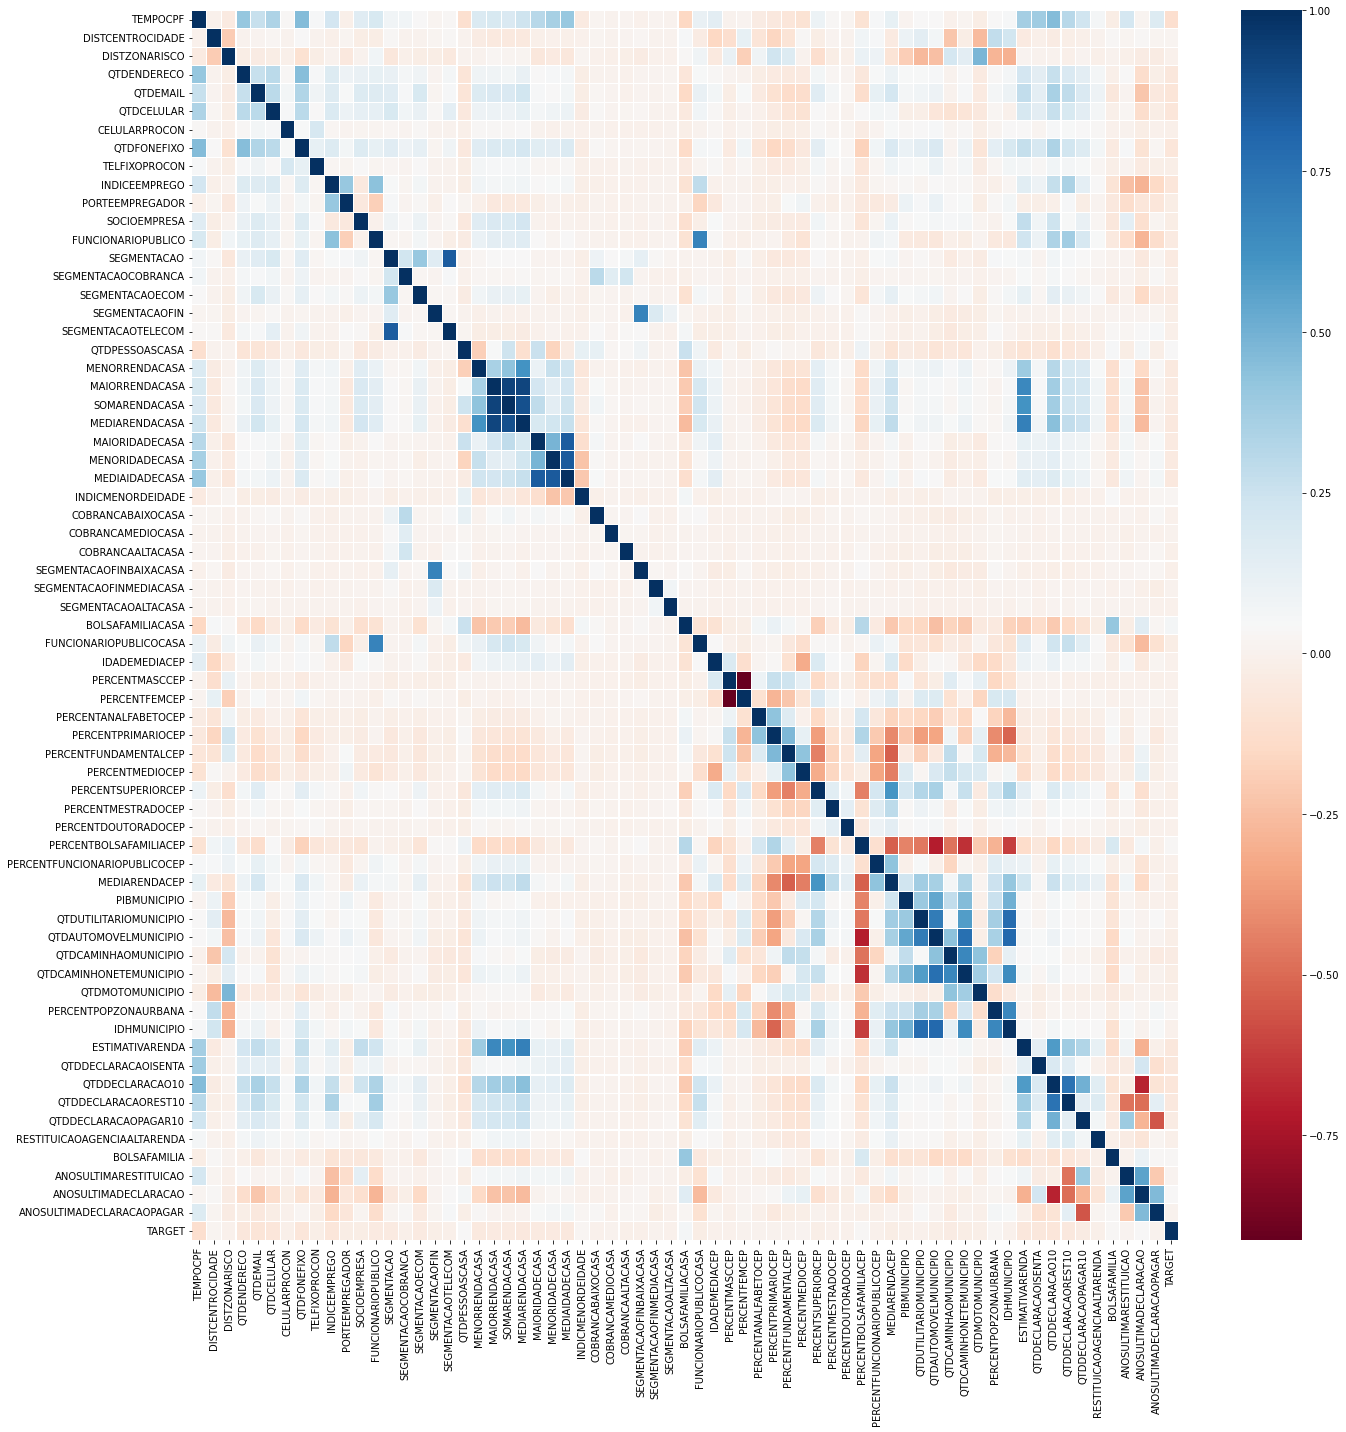

In [15]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlacao, xticklabels=correlacao.columns,
            yticklabels=correlacao.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.show()

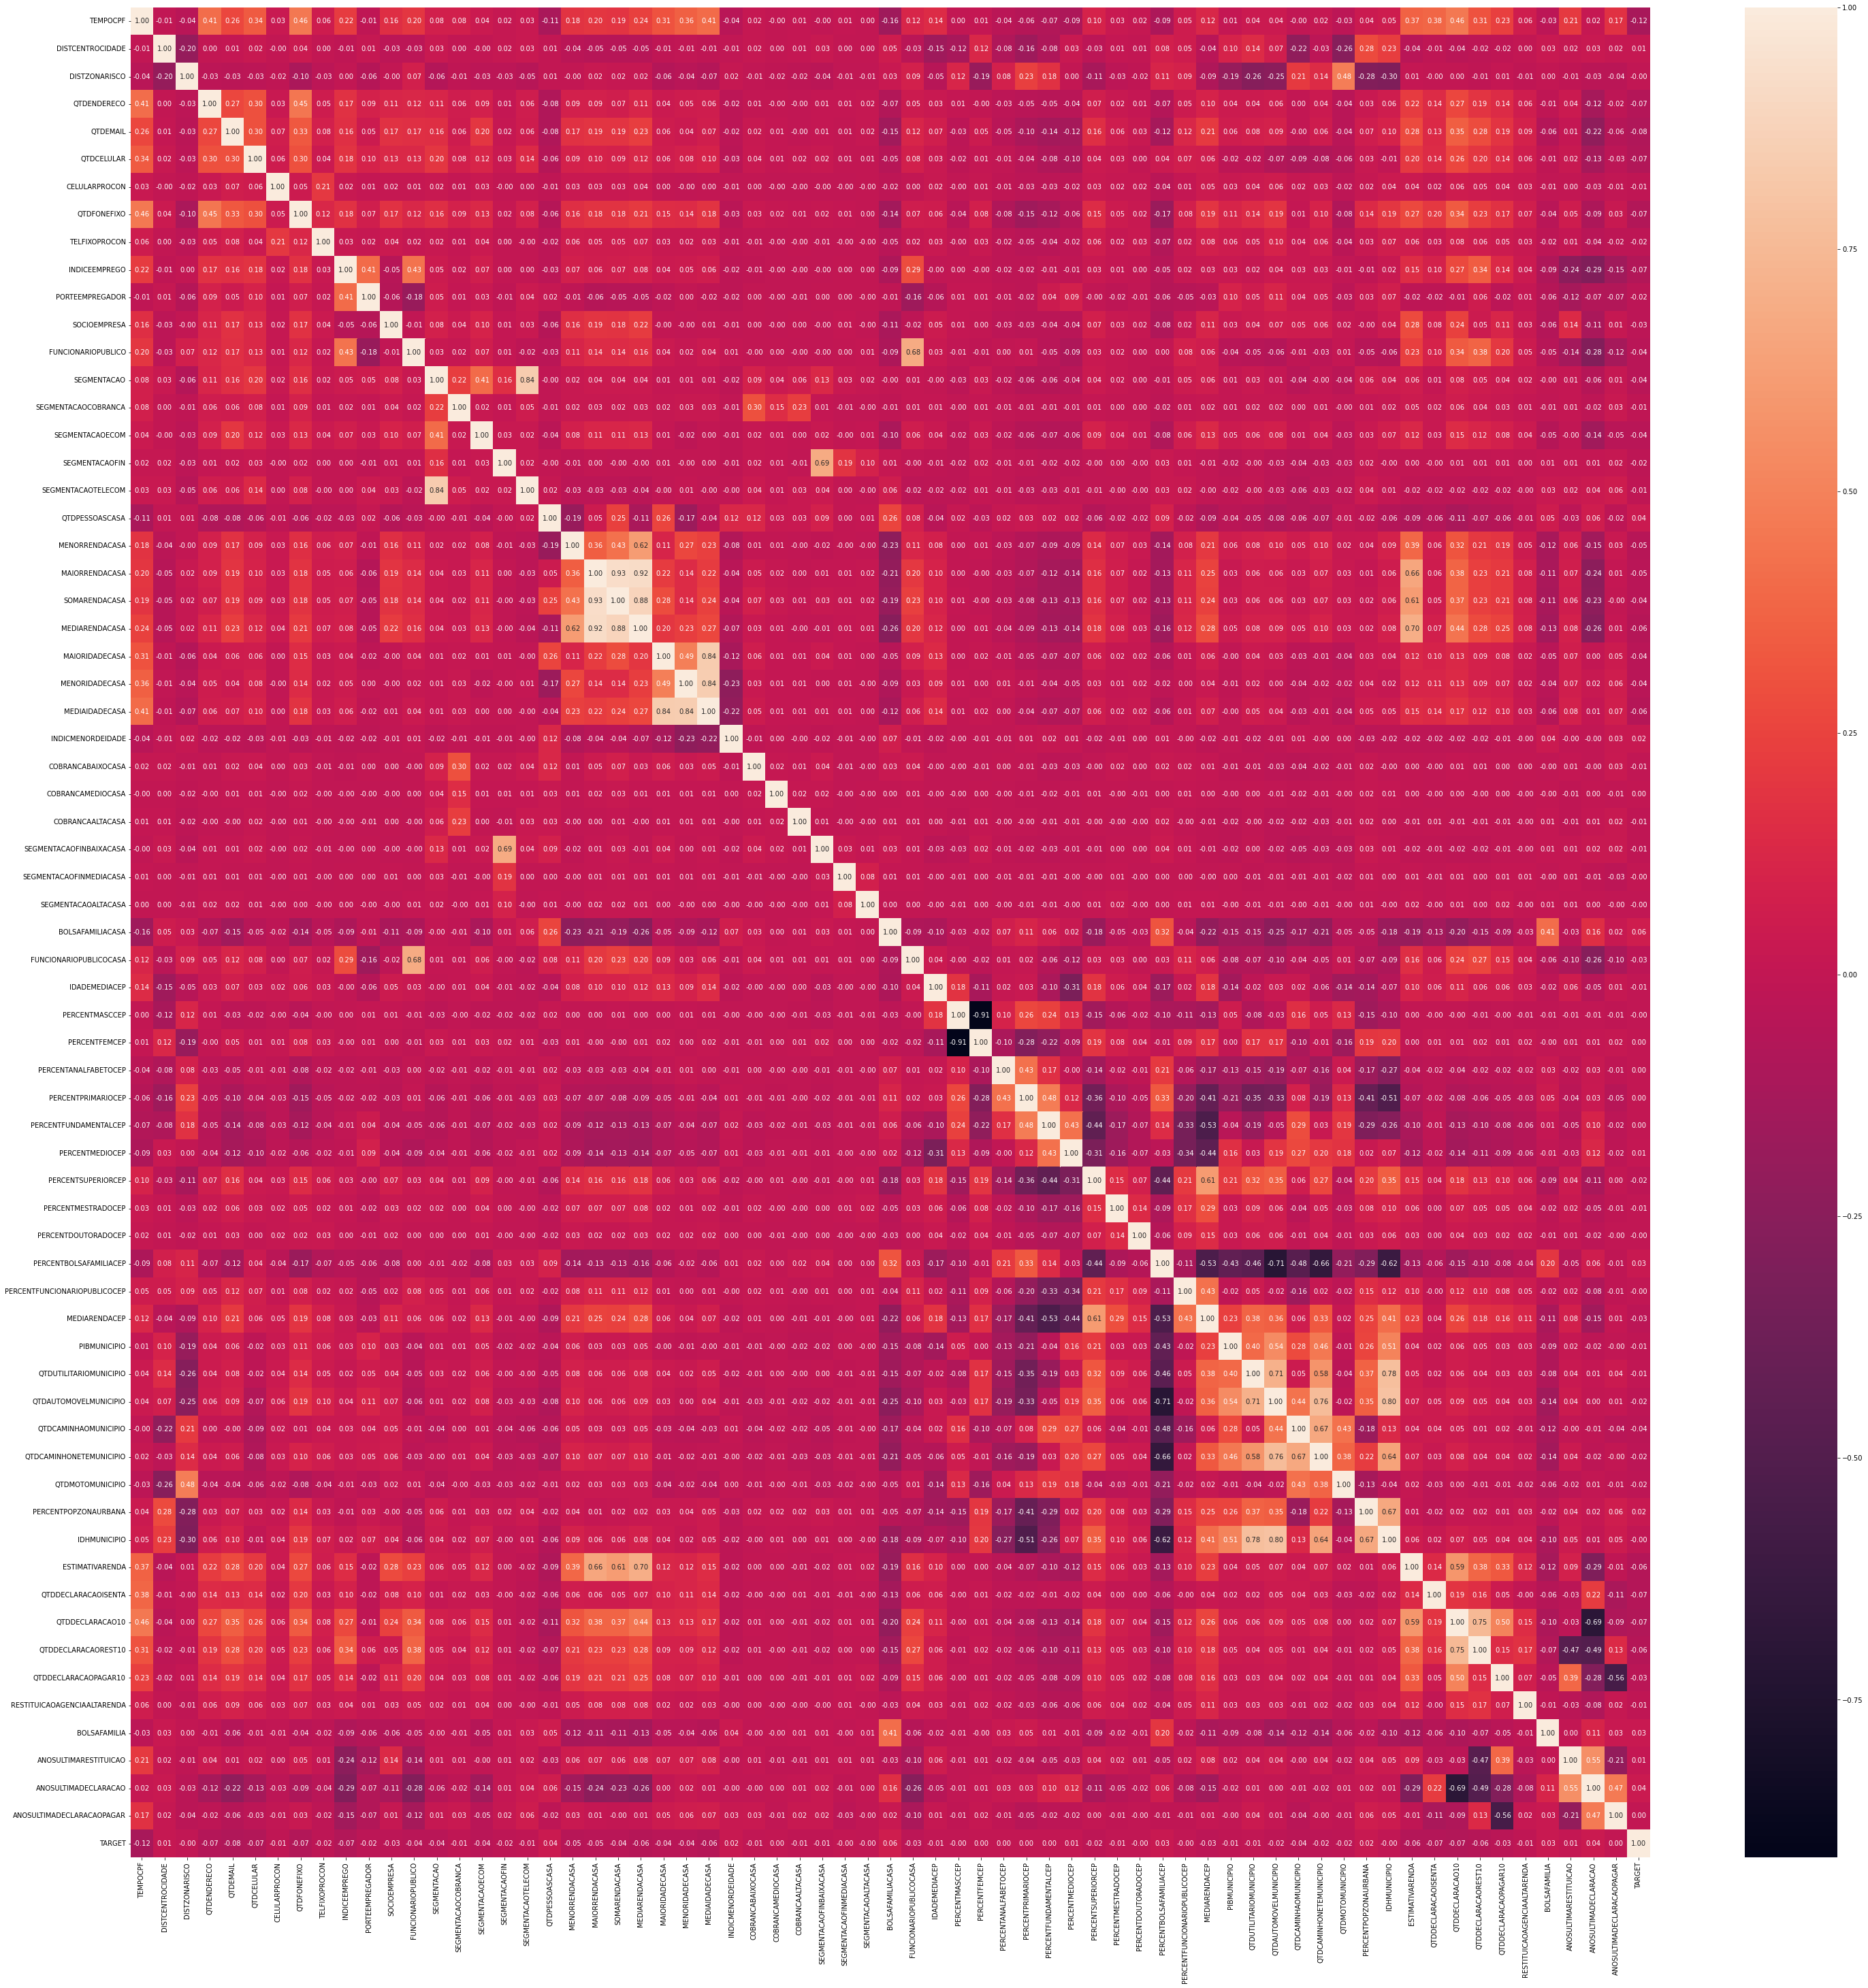

In [16]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlacao, annot=True, fmt='.2f')
plt.show()

# Análise Univalorada

## Análise 1

### Questão / Hipótese:
Existe um balanceamento de bons e maus pagadores?

### Análise:
Geramos um grafico de contagem (Balanceamento da base) para visualizar a distribuição de bons e maus pagadores.   

Skew: 2.7501 - Assimetria positiva   
Kurtosis: 5.5631 - Leptocurtica 

### Discussão:

Com a análise do resultado chegamos a conclusão de que a base de dados não é
balanceada, possuindo uma proporção de 8:2 entre bons e maus pagadores.

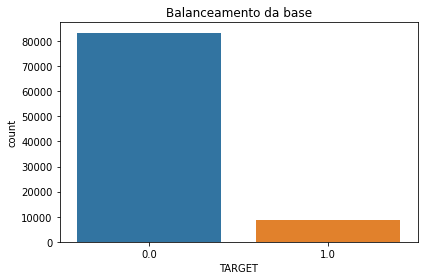

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="TARGET", data=train)
plt.title("Balanceamento da base")
plt.tight_layout()
plt.show()

## Análise 2

### Questão / Hipótese:
Pessoas que fazem emprestimos, tem CPF a mais tempo?

### Análise:
Geramos um gráfico de violino para visualizar a distribuição de pessoas conforme o tempo desde a emissão de seu CPF.   

Skew: 0.0009 - Assimetria Positiva   
Kurtosis: -1.3433 - Platicurtica

### Discussão:
Com base no gráfico, podemos ver que pessoas entre 25 e 30 anos de CPF costumam fazer mais emprestimos que outras idades de CPF.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


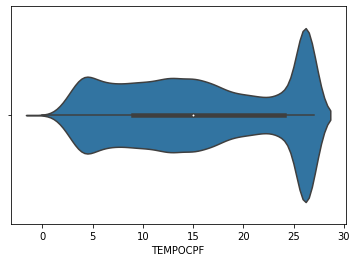

In [18]:
sns.violinplot(train["TEMPOCPF"])

## Análise 3

### Questão / Hipótese:
Nos acreditamos que a maioria das pessoas tem no mínimo 1 e-mail.

### Análise:
Geramos um gráfico de contagem para visualizar a quantidade de e-mails que cada pessoa possui cadastrado.

Skew: 1.8011 - Assimetria Positiva   
Kurtosis: 4.1905 - Leptocurtica

### Discussão:
Após analisar a distribuição, podemos ver que a maioria das pessoas não possuem e-mails cadastrados na base.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


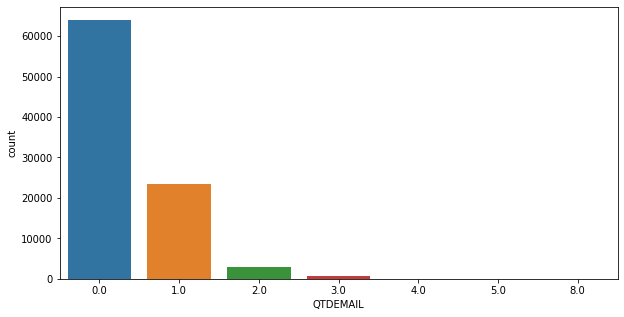

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train['QTDEMAIL'], ax=ax)
plt.show()

## Análise 4

### Questão / Hipótese:
Qual a porcentagem de pessoas que não declararam Imposto de Renda nos últimos 10 anos?

### Análise:
Plotamos um gráfico de setores para facilitar a visualização da distribuição das declarações.   

Skew: 1.9075 - Assimetria Negativa  
Kurtosis: 2.1912 - Platicurtica

### Discussão:

Podemos visualizar que a maior parte da população presente na base não declararam o Imposto de Renda nos últimos 10 anos 


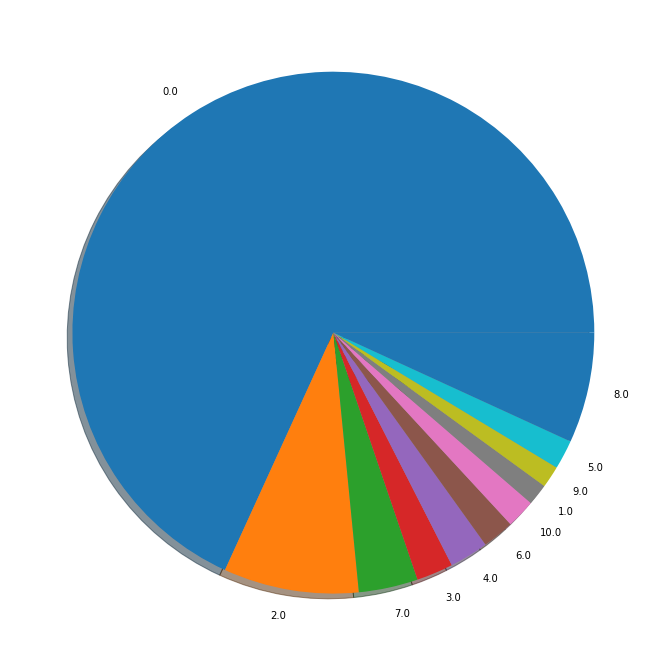

In [20]:
trainGraph = pd.DataFrame()
trainGraph["QTDDECLARACAO10"] = train["QTDDECLARACAO10"].dropna(axis=0)

fig = plt.figure(figsize =(15, 12))
plt.pie(trainGraph.groupby(["QTDDECLARACAO10"]).size(), shadow = True, labels = trainGraph["QTDDECLARACAO10"].unique())
plt.show()

## Análise 5

### Questão / Hipótese:
Os proponentes possuem empregos menos estáveis?

### Análise:
Geramos um gráfico de contagem para visualizar a distribuição da estabilidade de emprego.

Skew: 1.0209 - Assimetria Positiva   
Kurtosis: -0.5829 - Platicurtica

### Discussão:
Após visualizar o gráfico, podemos concluir que proponentes tendem a ter empregos mais instáveis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


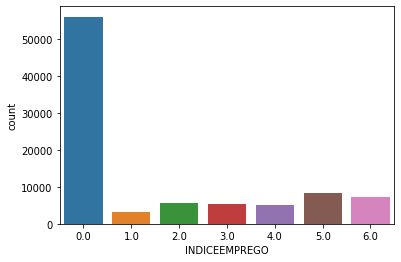

In [21]:
sns.countplot(train["INDICEEMPREGO"])
plt.show()

## Análise 6

### Questão / Hipótese:
Acreditamos que a maioria das pessoas possuem apenas 1 celular.

### Análise:
Geramos um gráfico de contagem para visualizar a quantidade de celulares

Skew: 2.2637 - Assimetria Positiva   
Kurtosis: 20.9783 - Leptocurtica

### Discussão:
Após analisar o gráfico podemos concluir que a maioria das pessoas não possui nenhum celular, entretanto a diferença entre as pessoas que possuem pelo menos um celular não é alta.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


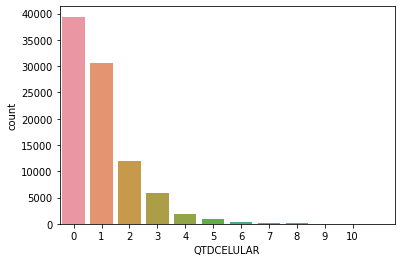

In [22]:
sns.countplot(train["QTDCELULAR"])
plt.xlim(-0.5,11.5)
plt.xticks(range(11), range(11))
plt.show()

## Análise 7

### Questão / Hipótese:
Acreditamos que a maioria das pessoas tem apenas 1 telefone fixo.

### Análise:
Geramos um gráfico de contagem para visualizar a quantidade de telefones fixos por CPF.

Skew: 5.4412 - Assimetria Positivo   
Kurtosis: 311.6339 - Leptocurtica

### Discussão:
Após analisar o gráfico podeos concluir que a maioria das pessoas possui pelo menos 1 telefone fixo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


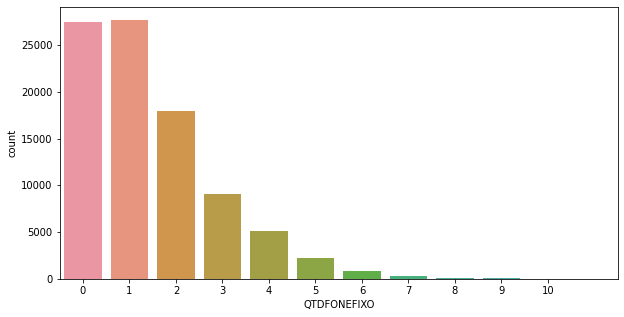

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDFONEFIXO"], ax=ax)
plt.xlim(-0.5,11.5)
plt.xticks(range(11), range(11))
plt.show()

## Análise 8

### Questão / Hipótese:
Quantas pessoas declaram o Imposto de Renda como insento?

### Análise:
Plotamos um gráfico de contagem para visaulizar o volume de delacração de Imposto de Renda insentos.

Skew: 2.0706 - Assimetria Positiva   
Kurtosis: 3.3564 - Leptocurtica

### Discussão:
Após analisar o gráfico podemos chegar a conclusão que a grande maioria não declarou o imposto de renda como isento, entretanto também sabemos por via de uma análise anterior que a maioria sequer declarou o imposto de renda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


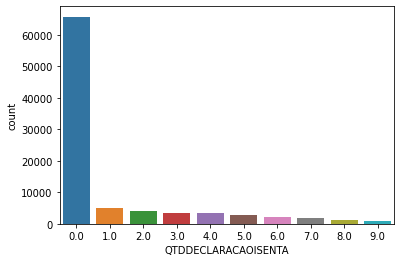

In [24]:
sns.countplot(train["QTDDECLARACAOISENTA"])
plt.show()

## Análise 9

### Questão / Hipótese:
Acreditamos que a maioria das pessoas terá registrado na base um endereço.

### Análise:
Geramos um gráfico boxplot para visualizar a quantidade de endereços.

Skew: 2.6343 - Assimetria Positiva   
Kurtosis: 2.6343 - Leptocurtica

### Discussão:
Após analisar os gráficos podemos concluir que a maioria das pessoas possui apenas 1 endereço registrado. Percebemos também vários outliers, como por exemplo, uma pessoa com 50 endereços.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


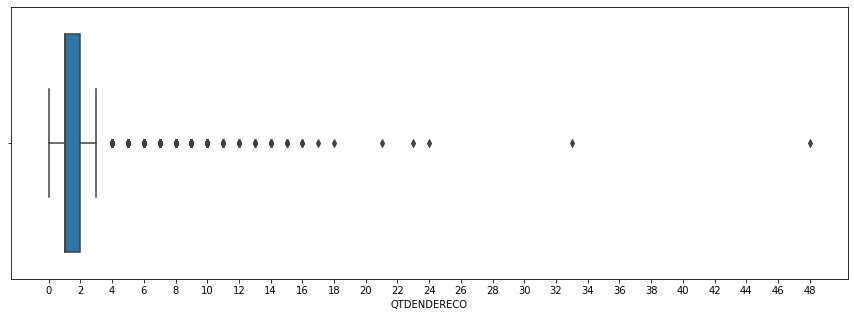

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(range(0,50,2),range(0,50,2))
sns.boxplot(train["QTDENDERECO"], ax=ax)
plt.show()

## Análise 10

### Questão / Hipótese:
Proponentes posuem renda estimada baixa?

### Análise:
Geramos um histograma para visualizar a estimativa de renda.

Skew: 3.4979 - Assimetria Positiva   
Kurtosis: 14.7122 - Leptocurtica

### Discussão:
Após analisar o gráfico gerado, é possivel concluir os proponentes possuem renda estimada baixa.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


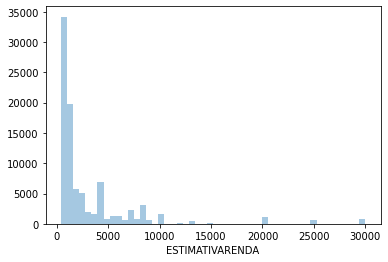

In [26]:
sns.distplot( a=train["ESTIMATIVARENDA"], hist=True, kde=False, rug=False )
plt.show()

## Análise 11

### Questão / Hipótese:
Qual a relação de pessoas que recebem e não recebem auxilio do programa Bolsa Família?

### Análise:
Geramos um gráfico de contagem para visualizar a quantidade de pessoas que possuem o benefício do Bolsa família.

Skew: 1.4397 - Assimetria Positiva   
Kurtosis: 0.0728 - Platicurtica

### Discussão:
Com base na visualização do gráfico podemos concluir que a maioria das pessoas não recebem o auxilio do bolsa família. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


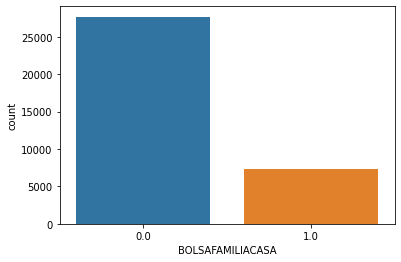

In [27]:
sns.countplot(train["BOLSAFAMILIACASA"])
plt.show()

## Análise 12

### Questão / Hipótese:
Quanto menor a renda da casa, maior a probabilidade propor um empréstimo?

### Análise:
Geramos um grafico de distribuição para visualizar a renda das casas.

Skew: 2.7440 - Assimetria Positiva   
Kurtosis: 9.8390 - Leptocurtica

### Discussão:
Após analisar o gráfico é possivel visualizar que a maioria dos empréstimos são realizados por residencias de baixa renda média.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

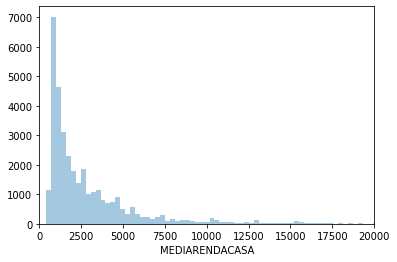

In [28]:
sns.distplot(train["MEDIARENDACASA"], kde=False, bins= 100)
plt.xlim(0,20000)
plt.show

## Análise 13

### Questão / Hipótese:
Quão grande são as maiores rendas das casas

### Análise:
Plotamos um gráfico boxplot para visualizar a maior renda da casa.

Skew: 2.3968 - Assimetria Positiva   
Kurtosis:5.9763 - Platicurtica

### Discussão:
Após analisar o gráfico, podemos ver que a mediana da renda da casa é menor que 5000. Além disso notamos que grande parte das maiores rendas está situada entre aproximadamente R\$1000 e R\$7000 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


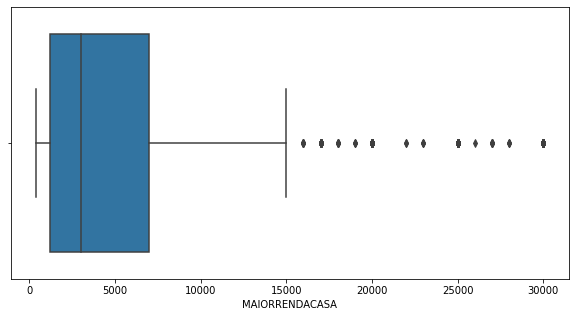

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(train['MAIORRENDACASA'], ax=ax)
plt.show()

## Análise 14

### Questão / Hipótese:
Residências com maior renda total realizam mais emprestimos? 

### Análise:
Geramos um histograma para visual a distribuição do total de rendas por residência.

Skew: 2.5114 - Assimetria Positiva   
Kurtosis:8.4275 - Leptocurtica

### Discussão:
Após analisar o gráfico, podemos concluir que não, residências com menor renda total realizam mais emprestimos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


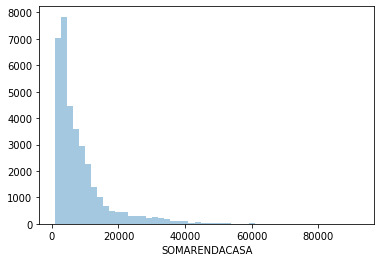

In [30]:
sns.distplot( a=train["SOMARENDACASA"], hist=True, kde=False, rug=False )
plt.show()

## Análise 15

### Questão / Hipótese:
Há balanceamento entre a quantidade de proponentes que são funcionários publicos e privados?

### Análise:
Geramos um gráfico para visualizar a proporção de funcionários publicos em relação a privados.

Skew: 2.8323 - Assimetria Positiva   
Kurtosis: 6.0224 - Leptocurtica

### Discussão:
Analisando o gráfico plotado podemos concluir que apenas uma pequena parte dos proponentes são funcionários publicos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


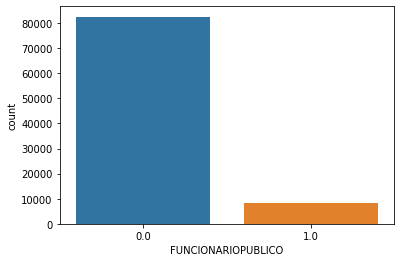

In [31]:
sns.countplot(train["FUNCIONARIOPUBLICO"])
plt.show()

## Análise 16

### Questão / Hipótese:
Qual a distribuição de densidade de pessoas que recebem Bolsa Família por CEP?

### Análise:
Geramos um gráfico boxplot para visualizar a concentração e distribuição de pessoas que recebem o auxilio por região.

Skew: 1.6074 - Assimetria Positivo   
Kurtosis: 3.0075 - Leptocurtica

### Discussão:
Após analisarmos o grafico, observamos que apesar da mediana ser aproximadamente 4%, algumas regiões são exceções e possuem grande concentração de famílias beneficiadas. O valor máximo é de aproximadamente 13%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


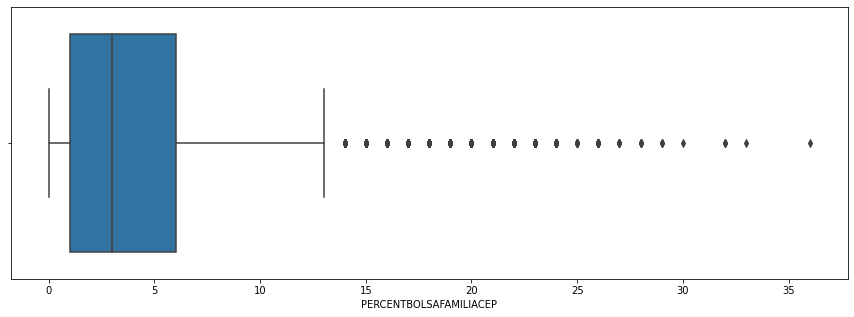

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["PERCENTBOLSAFAMILIACEP"], ax=ax)
plt.show()

## Análise 17

### Questão / Hipótese:
Regiões com renda média menor tendem a realizar mais empréstimos?

### Análise:
Geramos um gráfico para visualizar a renda média das regiões.

Skew: 1.7249 - Assimetria Positiva   
Kurtosis: 4.1422 - Leptocurtica

### Discussão:
Após realizar a análise, podemos concluir que sim, regiões com renda média menor tendem a realizar mais empréstimos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

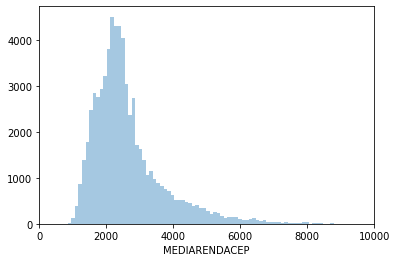

In [33]:
sns.distplot(train["MEDIARENDACEP"], kde=False, bins= 100)
plt.xlim(0,10000)
plt.show

## Análise 18

### Questão / Hipótese:
Acreditamos que a quantidade de pessoas em uma casa será igual a 3.

### Análise:
Geramos o gráfico para visualizar a quantidade de pessoas em uma casa.

Skew:1.7554 - Assimetria Positiva   
Kurtosis: 4.1512 - Leptocurtica

### Discussão:
Após analisar o gráfico é possível visualizar que na maioria dos casos, a quantidade de pessoas em uma casa é igual a dois.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


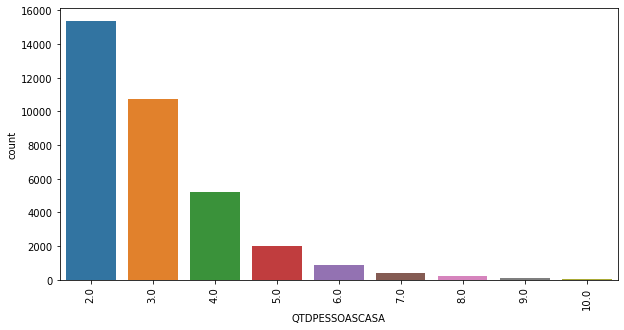

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDPESSOASCASA"], ax=ax)
plt.xticks(rotation = 90)
plt.show()

## Análise 19

### Questão / Hipótese:
Acreditamos que casas com média de idade mais jovem tendem a realizar mais emprestimos

### Análise:

Geramos um gráfico Boxplot para entender qual a distribuição da idade média

Skew: 2.6408 - Assimetria Positiva   
Kurtosis: 7.9264 - Leptocurtica

### Discussão:
Após a análise do grafico, chegamos a conclusão de que a média de idade da residencia dos proponentes é entre 29 e 42 anos, ou seja, casas com média de idade mais jovem não tendem a realizar mais emprestimos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


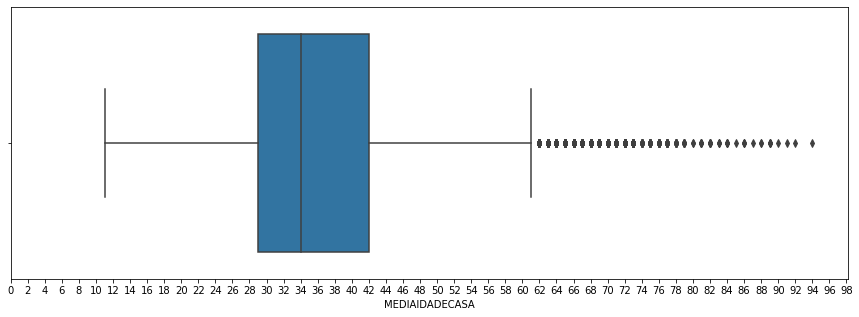

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["MEDIAIDADECASA"], ax=ax)
plt.xticks(range(0,100,2))
plt.show()


## Análise 20

### Questão / Hipótese:
Os proponentes são de regiões com idade média mais baixa?

### Análise:
Geramos um gráfico para visualizar a faixa etária.

SKEW: 0.3634 - Assimetria Positivo   
Kurtosis: 1.0071 - Platicurtica

### Discussão:
Após analisar o gráfico é possivel identificar que os proponentes são de regiões com idades mais altas, com o pico em 46 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


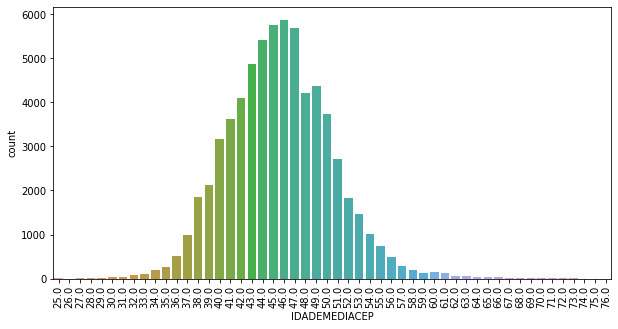

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["IDADEMEDIACEP"], ax=ax)
plt.xticks(rotation = 90)
plt.show()

# Análise Multivalorado

## Análise Multivalorado 1

### Questão / Hipótese:
O percentual de bolsa familia por CEP é proporcional a renda média por CEP?


### Análise:
Geramos um gráfico do tipo kdeplot com a concentração dos valores.

### Discussão:
Podemos observar que existe um concentração muito forte entre $0\leq x \leq 5$ e $200 \leq y \leq 4000$. Também é possível notar uma distribuição a direita, positiva.

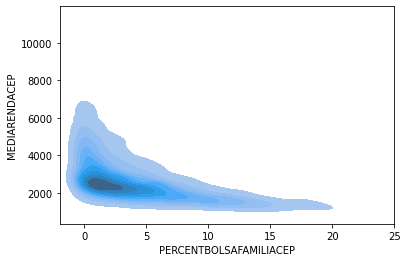

In [37]:
sns.kdeplot(x=train["PERCENTBOLSAFAMILIACEP"], y=train["MEDIARENDACEP"], shade=True)
plt.xlim(-2, 25)
plt.show()

## Análise Multivalorado 2

### Questão / Hipótese:  
Quanto maior a idade média em um endereço, maior a porcentagem de endereços beneficiados pelo bolsa família?

### Análise:  
O gráfico que escolhemos para analisar este caso foi o chamado de joint. Ele gera um gráfico de dispersão entre as variáveis analisadas (`PERCENTBOLSAFAMILIACEP` e `IDADEMEDIACEP`) juntamente com um histograma de cada uma das variáveis em seu respectivo eixo para uma análise detalhada de seus valores

### Discussão:  
Com base na análise do gráfico é possível perceber que entre 30 e 50 anos de média de idade nos endereços, há um aumento da densidade e do valor da porcentagem de indivíduos com bolsa família por residência. Isto pode ocorrer pois quanto mais moradores ou quanto mais idosos estes moradores, maior o gasto mensal/anual de uma residência. Ou seja, quanto mais pessoas, mais dependentes, dificultando para aqueles que geram a renda da casa, aumentando a taxa de pessoas com bolsa familia por residência. Cerca de 57 anos para frente a taxa de pessoas com bolsa família começa a reduzir, possivelmente ocasionado pela aposentadoria de idosos presentes nas residências, que gera renda extra para sustento.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


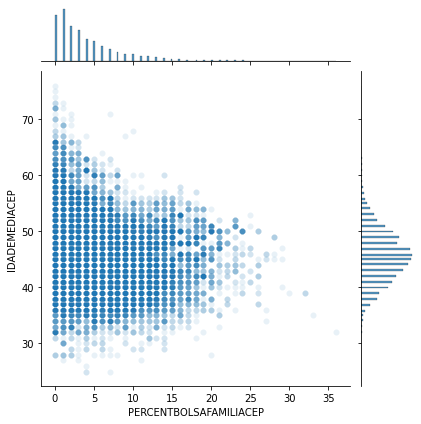

In [38]:
sns.jointplot(train["PERCENTBOLSAFAMILIACEP"], train["IDADEMEDIACEP"], alpha=0.1)

## Análise Multivalorado 3

### Questão / Hipótese:
Há relação entre a quantidade de vezes que o cidadão declarou imposto de renda a pagar nos últimos 10 anos e o recebimento ou não do benefício Bolsa família?

### Análise:
Para esta questão com duas classes de valores, o gráfico crosstab com exibição através de heatmap oferece uma boa visualização dos dados disponíveis.

### Discussão:
Quando analisada a parte de pessoas que possuem o benefício do bolsa família, nota-se que a maioria das que o possuem declarou nada a pagar nos últimos 10 anos. Ou seja, pessoas que recebem bolsa familia tendem a pagar menos imposto de renda que pessoas que não recebem, porém a diferença é pequena. 

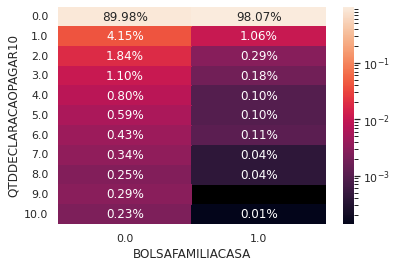

In [ ]:
ctab = pd.crosstab(train['QTDDECLARACAOPAGAR10'], train['BOLSAFAMILIACASA'], normalize='columns')
sns.set(rc={'axes.facecolor':'black'})
sns.heatmap(ctab, annot=True, fmt='.2%', norm=LogNorm(), )
plt.show()

In [ ]:
sns.reset_defaults()

## Análise Multivalorado 4

### Questão / Hipótese: 
Há alguma relação entre o tempo que o cidadão possui CPF e o índice de emprego?

### Análise:
Foi plotado um gráfico de linha contendo o tempo de CPF no eixo X e o índice de emprego no eixo Y. Para esta hipótese, esse tipo de gráfico deve exibir com clareza qualquer tendência observável.

### Discussão:
No gráfico fica evidente um aumento consistente e proporcional do índice de emprego até os CPFs com cerca de 20 anos de existência. Após isso, o índice estabiliza apresentando uma pequena queda. Isso provavelmente se deve ao fato de que as pessoas em média registram seu CPF durante a adolescência e com o passar do tempo vão se inserindo no mercado de trabalho.

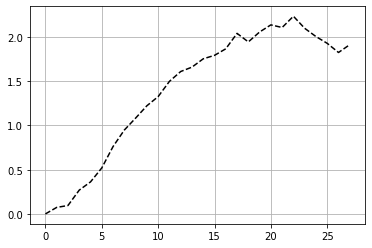

In [39]:
mean = []
for tcpf in sorted(train["TEMPOCPF"].unique()):
    if tcpf == np.nan:
        continue
    mean.append((train.loc[train['TEMPOCPF'] == tcpf])['INDICEEMPREGO'].mean())
plt.grid()
plt.plot(sorted(train["TEMPOCPF"].unique()), mean, linestyle='--',color="black")

## Análise Multivalorado 5

### Questão / Hipótese:
Qual a relação entre o índice de emprego e a estimativa de renda?

### Análise:
Geramos um gráfico boxplot para visualizar a relação entre o índice de emprego e a estimativa de renda.

Escolhemos utilizar essas duas colunas pois uma coluna pode influenciar diretamente a outra.

### Discussão:
Após realizar a análise do gráfico podemos chegar a conclusão que quanto maior o indice de emprego, maior a estimativa de renda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


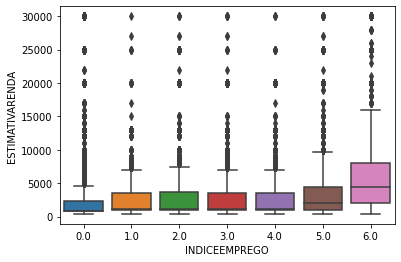

In [40]:
# INDICEEMPREGO / ESTIMATIVARENDA
sns.boxplot(train['INDICEEMPREGO'], train['ESTIMATIVARENDA'])
plt.show()


## Análise Multivalorado 6

### Questão / Hipótese:  
Pessoas que possuem o benefício do Bolsa Família tendem a ter empregos menos estáveis?


### Análise:
Geramos um gráfico crosstab com exibição de heatmap para melhorar a visualização dos números maiores e menores, facilitando o entendimento.

### Discussão:  
Analisando o gráfico podemos ver que, comparando pessoas que recebem e não recebem o bolsa família, aqueles que não possuem o benefício tem uma tendência maior (quase 25%) de ter empregos menos estáveis. Os beneficiados podem ter acesso ao benefício do bolsa família devido ao nível de estabilidade de seus empregos, visto que quando o emprego é muito instável um indivíduo fica pouco tempo nele, ocasionando recebimento de pouco dinheiro mensal, que da acesso ao bolsa família.

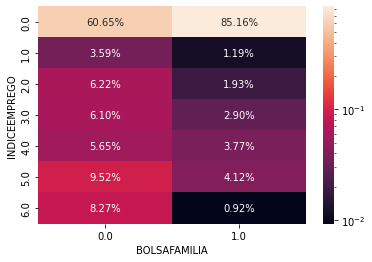

In [58]:
ctab = pd.crosstab(train['INDICEEMPREGO'], train['BOLSAFAMILIA'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%',norm=LogNorm())
plt.show()

## Análise Multivalorado 7

### Questão / Hipótese:  
O aumento de moradores de uma casa diminui a soma da renda da casa?


### Análise:
Para analisar melhor esse caso, optou-se por um grafico Strip que diferencia as categorias utilizando um grafico de dispersão. Utilizamos transparência para representar a densidade, assim facilitando a visualização.

### Discussão:

Observando os resultados obtidos, percebe-se que conforme o número de moradores por residência aumenta, a soma de renda máxima de cada casa diminui. Entretando, a soma da renda mínima de cada casa aumenta levemente conforme aumenta o número de moradores. Isso pode ocorrer pois, ao mesmo tempo que o número de pessoas para gerar renda aumenta, o número de dependentes também pode aumentar. Ou seja, mesmo que aumente o número de pessoas em cada casa, nem todas podem estar gerando uma renda considerável.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


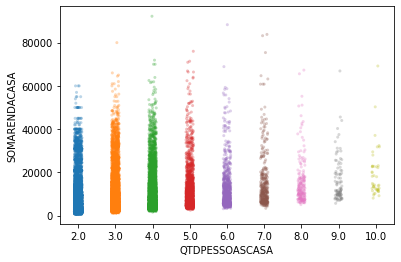

In [44]:
sns.stripplot(train['QTDPESSOASCASA'], train['SOMARENDACASA'], size=3, alpha=0.3)
plt.show()

## Análise Multivalorado 8

### Questão / Hipótese:
O aumento da soma da renda de uma residência e a quantidade de celular é diretamente proporcional?

### Análise:
Geramos um gráfico para visualizar o impacto da quantidade de celular na renda das residências.

Escolhemos relacionar essas colunas pois acreditamos que um pode influiencia no resultado do outro. 

### Discussão:
Após realizar a análise do gráfico podemos ver que quanto maior a quantidade de celular, aumenta consideravelmente a renda da casa. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


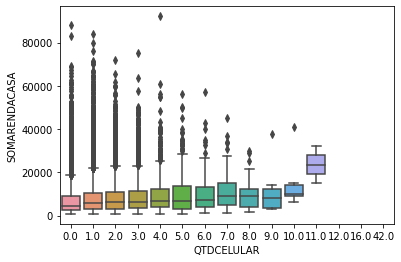

In [45]:
#sns.stripplot(train['QTDCELULAR'], train['SOMARENDACASA'], size=3, alpha=0.3)
sns.boxplot(train['QTDCELULAR'], train['SOMARENDACASA'])
plt.show()

## Análise Multivalorado 9

### Questão / Hipótese:  
Quanto maior o tempo de CPF de uma pessoa, maior a média da renda de sua casa?


### Análise:  
Para analisar melhor o caso, optamos por um  gráfico de dispersão que diferencia as categorias, ou um grafico strip, que deixa mais visível a densidade devido à transparência aplicada.


### Discussão:  
Analisando o gráfico é possível perceber que conforme o tempo de CPF de um indivíduo aumenta, a média e a concentração aumentam, na maioria dos casos, salvo de 26 para 27 anos e de 17 a 23. Fica mais dificil de justificar essa ocorrência visto que o tempo de CPF não corresponde à idade de cada indivíduo. Portanto, esse aumento pode ser pois uma criança virou adulta e começou a trabalhar, assim aumentando a renda, ou um adulto teve filhos e essa renda aumenta quando eles começam a contribuir.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


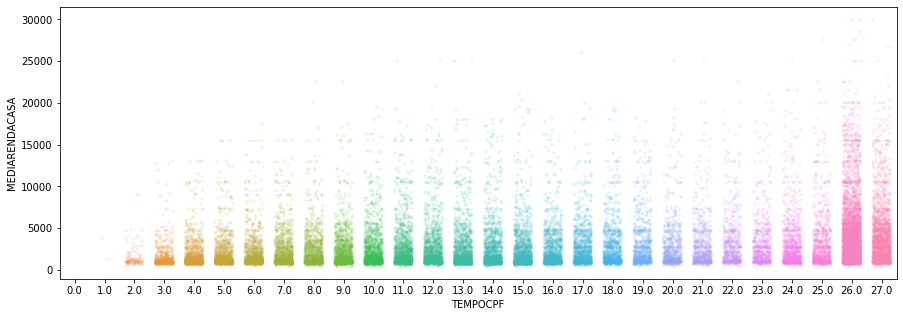

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(train['TEMPOCPF'], train['MEDIARENDACASA'], size=3, alpha=0.15, jitter=0.3, ax=ax)
plt.show()

## Análise Multivalorado 10

### Questão / Hipótese:  
O aumento da renda média por residência ocasiona ao aumento da quantidade de celulares por casa?


### Análise:
Para analisar bem este caso, geramos um boxplot, possibilitando um entendimento melhor dos quartis, medianas e outliers

### Discussão:  
É visivel pelo gráfico que conforme o número de celulares em uma residência aumenta, há um aumento no valor máximo, mediana, e no intervalo interquartil, na maioria dos casos. Isso pode ocorrer por diversos motivos, como algum dos residentes trabalhar em uma empresa boa que o fornece um dispositivo para trabalhar, aumentando o número de aparelhos e a renda média. Além disso, conforme o número de celulares aumenta, reduz o número de outliers de média de renda.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


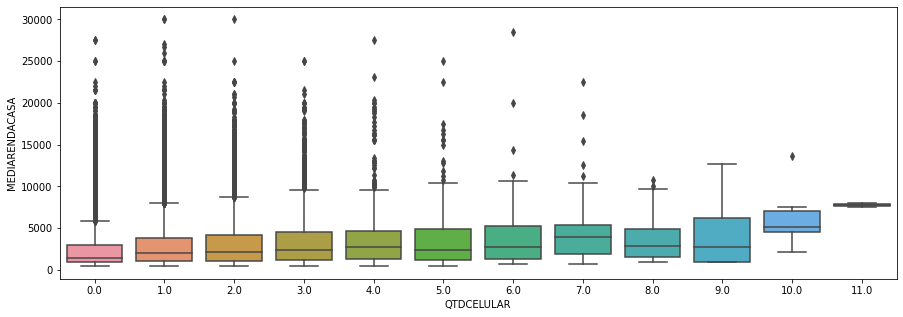

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train['QTDCELULAR'], train['MEDIARENDACASA'], ax=ax)
plt.xlim(-0.5,11.5)
plt.show()


# Visualização Efetiva

Text(0, 0.5, 'Índice de Emprego')

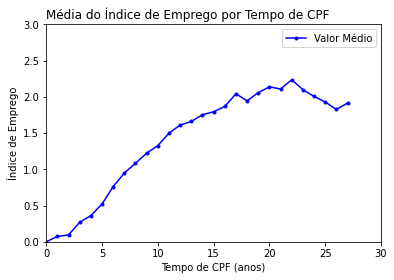

In [48]:
mean = []
for tcpf in sorted(train["TEMPOCPF"].unique()):
    if tcpf == np.nan:
        continue
    mean.append((train.loc[train['TEMPOCPF'] == tcpf])['INDICEEMPREGO'].mean())

plt.title("Média do Índice de Emprego por Tempo de CPF", loc="left")
plt.plot(sorted(train["TEMPOCPF"].unique()), mean, label="Valor Médio",  linestyle='-', marker='o', ms=3, color="blue")
plt.ylim(0.0, 3.0)
plt.xlim(0, 30)
plt.legend()
plt.xlabel("Tempo de CPF (anos)")
plt.ylabel("Índice de Emprego")

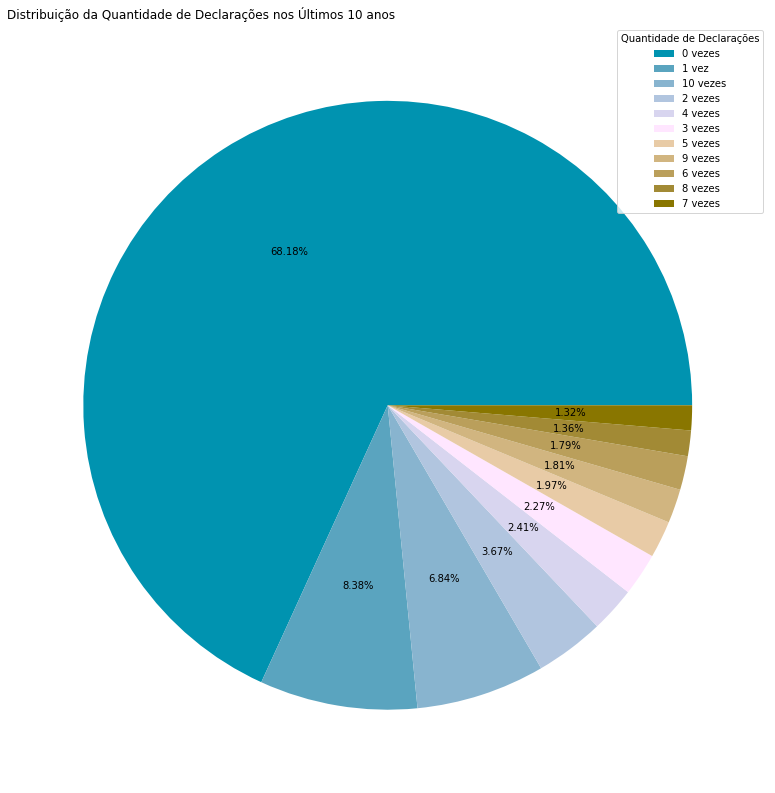

In [49]:
## Dataframe da quantidade de declarações
qtdDeclaracao = pd.DataFrame()
qtdDeclaracao["QTDDECLARACAO10"] = train["QTDDECLARACAO10"].dropna(axis=0)

## Gerar a distribuição de cada valor
pctgDeclaracao = qtdDeclaracao.groupby(["QTDDECLARACAO10"]).size() / sum(qtdDeclaracao.groupby(["QTDDECLARACAO10"]).size())
pctgDeclaracao = list(enumerate(pctgDeclaracao))

## Realizar um sort por valor desc.
pctgDeclaracao = sorted(pctgDeclaracao, key=lambda a: a[1], reverse=True)

## Gerar os labels
state = list(map(lambda a: f"{a[0]} {'vez' if a[0] == 1 else 'vezes'}",pctgDeclaracao))

## Gerar o grafico

fig = plt.figure(figsize =(16, 14))
plt.title("Distribuição da Quantidade de Declarações nos Últimos 10 anos", loc="left")

colors = ['#0093b0', '#5aa4bf', '#88b4cf', '#b1c5df', '#d8d5ef', '#ffe6ff', '#e8cba6', '#d1b580', '#ba9f5b', '#a28a35', '#897600']
plt.pie(list(map(lambda a: a[1],pctgDeclaracao)), autopct='%1.2f%%', colors = colors)

plt.legend(state, title = "Quantidade de Declarações")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


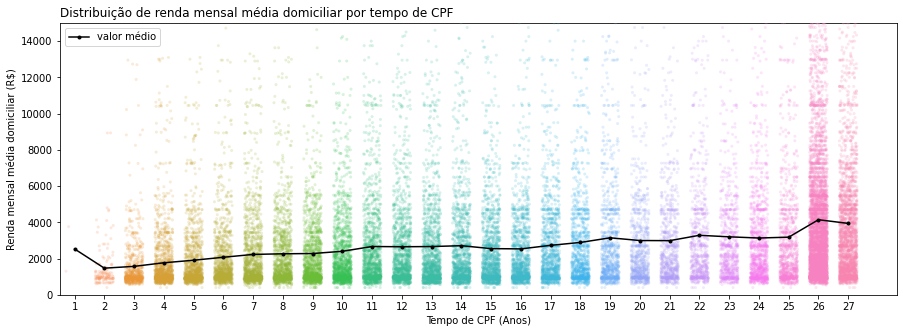

In [50]:
## Criar a figura
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Distribuição de renda mensal média domiciliar por tempo de CPF", loc="left")

# Plot dos dados
sns.stripplot(train['TEMPOCPF'], train['MEDIARENDACASA'], size=3, alpha=0.2, jitter=0.3, ax=ax)
plt.xlabel("Tempo de CPF (Anos)")
plt.ylabel("Renda mensal média domiciliar (R$)")
plt.xticks(range(int(max(train['TEMPOCPF'].unique())+1)),range(int(max(train['TEMPOCPF'].unique())+1)))

## Calcular a linha média
mean = []
for tcpf in sorted(train["TEMPOCPF"].unique()):
    if tcpf == np.nan:
        continue
    mean.append((train.loc[train['TEMPOCPF'] == tcpf])['MEDIARENDACASA'].mean())
plt.plot(sorted(train["TEMPOCPF"].unique()), mean, label="valor médio", linestyle='-', marker='o', ms=3, color="black", zorder=3)


plt.ylim(0,15000)
plt.xlim(0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


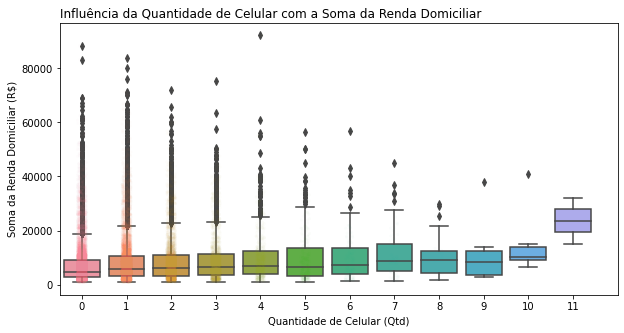

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.stripplot(train['QTDCELULAR'], train['SOMARENDACASA'], size=3, alpha=0.02, ax=ax)
sns.boxplot(train['QTDCELULAR'], train['SOMARENDACASA'], ax=ax)
plt.title("Influência da Quantidade de Celular com a Soma da Renda Domiciliar", loc="left")
plt.xlabel("Quantidade de Celular (Qtd)")
plt.ylabel("Soma da Renda Domiciliar (R$)")
plt.xlim(-0.5, 12)
plt.xticks(range(12), range(12))
plt.show()

In [52]:
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


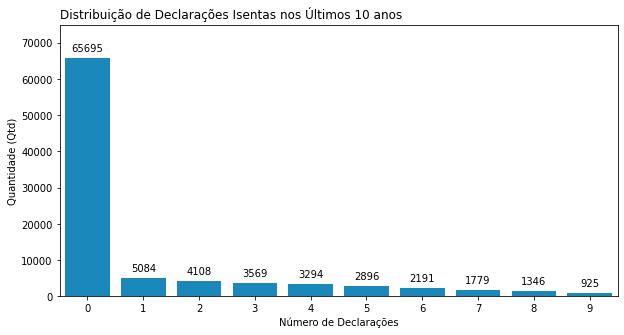

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDDECLARACAOISENTA"], color = "#0092D4", ax=ax)
add_value_labels(ax)
plt.title("Distribuição de Declarações Isentas nos Últimos 10 anos", loc="left")
plt.xlabel("Número de Declarações")
plt.ylabel("Quantidade (Qtd)")
plt.xlim(-0.5, 9.5)
plt.ylim(0, 75000)
plt.xticks(range(10), range(10))
plt.show()

# Variable Inflation Factor (VIF)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Função utilizada para calcular o VIF
def calc_VIF(df_x):
  df_x = add_constant(df_x)
  vif = pd.DataFrame()
  vif["variables"] = df_x.columns
  vif["VIF"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
  vif["Correlation"] = [abs(round(df_x[i].corr(df_x["TARGET"])*100,2)) for i in df_x.columns]
  return vif

In [55]:
# Substituindo valores nulos pela média de cada coluna

trainViF = train.fillna(train.mean())

In [56]:
calc_VIF(trainViF).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


variables          VIF  Correlation
0                          const  6168.559001          NaN
26                MEDIAIDADECASA    23.656130         3.34
23                MEDIARENDACASA    21.135635         3.37
21                MAIORRENDACASA    19.671731         2.68
22                 SOMARENDACASA    14.975082         2.60
14                   SEGMENTACAO    10.086600         3.82
24                MAIORIDADECASA     9.954311         2.42
56                  IDHMUNICIPIO     9.095052         0.30
25                MENORIDADECASA     8.196561         2.58
38                 PERCENTFEMCEP     7.792588         0.08
18            SEGMENTACAOTELECOM     7.754747         1.04
37                PERCENTMASCCEP     7.718542         0.14
53       QTDCAMINHONETEMUNICIPIO     7.709098         1.92
51         QTDAUTOMOVELMUNICIPIO     7.107892         1.74
59               QTDDECLARACAO10     5.477419         7.33
50        QTDUTILITARIOMUNICIPIO     3.970453         0.57
52          QTDCAMINHAOMUNICIPIO     3.965588         2.85
60           QTDDECLARACAOREST10     3.475962         5.79
46        PERCENTBOLSAFAMILIACEP     3.279841         2.63
20                MENORRENDACASA     3.263217         2.81
48                 MEDIARENDACEP     3.172885         2.13
19                QTDPESSOASCASA     2.935052         2.34
55          PERCENTPOPZONAURBANA     2.580446         1.80
16               SEGMENTACAOECOM     2.453090         4.27
61          QTDDECLARACAOPAGAR10     2.136092         3.40
54              QTDMOTOMUNICIPIO     2.017851         1.86
1                       TEMPOCPF     1.989213        11.60
41         PERCENTFUNDAMENTALCEP     1.985427         0.15
40            PERCENTPRIMARIOCEP     1.972287         0.27
13            FUNCIONARIOPUBLICO     1.938403         4.06
57               ESTIMATIVARENDA     1.904138         6.36
10                 INDICEEMPREGO     1.881830         7.33
42               PERCENTMEDIOCEP     1.832618         0.84
3                  DISTZONARISCO     1.827349         0.16
43            PERCENTSUPERIORCEP     1.789648         1.71
65          ANOSULTIMADECLARACAO     1.641712         1.91
8                    QTDFONEFIXO     1.588642         6.86
49                  PIBMUNICIPIO     1.588440         0.99
11               PORTEEMPREGADOR     1.543354         2.35
17                SEGMENTACAOFIN     1.413273         2.19
36                 IDADEMEDIACEP     1.412917         0.56
4                    QTDENDERECO     1.409791         6.49
47  PERCENTFUNCIONARIOPUBLICOCEP     1.405097         0.25
15           SEGMENTACAOCOBRANCA     1.364300         1.20
64         ANOSULTIMARESTITUICAO     1.333174         0.28
35        FUNCIONARIOPUBLICOCASA     1.330895         1.62
5                       QTDEMAIL     1.329580         7.60
6                     QTDCELULAR     1.310057         7.26
66     ANOSULTIMADECLARACAOPAGAR     1.301574         0.02
34              BOLSAFAMILIACASA     1.289486         3.63
58           QTDDECLARACAOISENTA     1.267094         6.69
39          PERCENTANALFABETOCEP     1.261407         0.35
2               DISTCENTROCIDADE     1.251877         1.18
31       SEGMENTACAOFINBAIXACASA     1.237661         0.85
12                  SOCIOEMPRESA     1.194239         2.72
63                  BOLSAFAMILIA     1.120266         2.86
44            PERCENTMESTRADOCEP     1.116134         0.45
27             INDICMENORDEIDADE     1.076407         1.42
9                  TELFIXOPROCON     1.070594         1.63
28             COBRANCABAIXOCASA     1.061629         0.46
7                  CELULARPROCON     1.052440         0.91
62   RESTITUICAOAGENCIAALTARENDA     1.047612         0.91
45           PERCENTDOUTORADOCEP     1.036603         0.27
30              COBRANCAALTACASA     1.024139         0.57
67                        TARGET     1.023169       100.00
32       SEGMENTACAOFINMEDIACASA     1.021074         0.08
33           SEGMENTACAOALTACASA     1.011138         0.17
29         

# Outliers

In [57]:
# lista com os outliers
outliers = []

# loop para processar cada coluna
for col in train.select_dtypes(include = "number").columns.values:

    # calculando os quartis
    q1 = train[col].quantile(q=0.25)
    q3 = train[col].quantile(q=0.75)

    # calcular o IQR 
    iqr = q3 - q1 

    # Calculando os Whiskers 
    whisker_sup = q3 + 1.5 * iqr
    whisker_inf = q1 - 1.5 * iqr

    # selecionando os outliers da coluna
    mask = (train[col] > whisker_sup) | (train[col] < whisker_inf) 
    outliers_col = list(train[mask].index)

    print(f'{col} tem os outliers: {outliers_col}')

    # adicionando todos os indices na lista global de outliers 
    outliers.extend(outliers_col)

# contando quantas vezes cada instancia foi marcada
from collections import Counter
contagem = Counter(outliers)
print('\n Contagem das instancias que mais foram marcadas: \n', contagem.most_common(10))

TEMPOCPF tem os outliers: []
DISTCENTROCIDADE tem os outliers: [27, 62, 77, 79, 105, 110, 143, 229, 293, 453, 470, 471, 479, 553, 565, 615, 621, 672, 688, 715, 721, 771, 774, 838, 862, 871, 911, 934, 967, 976, 1002, 1006, 1018, 1051, 1061, 1064, 1113, 1167, 1179, 1187, 1194, 1207, 1272, 1304, 1311, 1317, 1356, 1361, 1416, 1439, 1441, 1463, 1466, 1480, 1539, 1549, 1607, 1608, 1644, 1674, 1697, 1704, 1705, 1714, 1735, 1825, 1837, 1892, 1925, 2004, 2062, 2078, 2102, 2103, 2105, 2160, 2165, 2242, 2270, 2280, 2326, 2366, 2466, 2467, 2470, 2498, 2550, 2566, 2596, 2610, 2665, 2683, 2686, 2687, 2705, 2741, 2758, 2788, 2840, 2886, 2896, 2941, 2997, 3012, 3036, 3048, 3108, 3158, 3210, 3234, 3269, 3273, 3275, 3320, 3336, 3359, 3382, 3414, 3437, 3448, 3450, 3547, 3555, 3605, 3619, 3629, 3667, 3704, 3711, 3793, 3848, 3854, 3893, 3895, 3904, 3915, 3939, 3944, 3958, 4031, 4051, 4068, 4090, 4179, 4208, 4259, 4316, 4317, 4363, 4419, 4429, 4435, 4462, 4463, 4471, 4531, 4550, 4638, 4709, 4720, 4728, 4755